# AWAL LIDYA MUSAFFAK

# SC60113

# ASSIGMENT 2

# DATA HEART

# 1. DATA PREPARATION


In [1]:
import pandas as pd
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [2]:
df.head() #menampilkan 5 data teratas

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.shape #menampilkan dimensi data

(1025, 14)

Didapatkan bahwa terdapat 1025 baris dan 14 kolom pada data jantung

In [4]:
df.info() #mengecek informasi data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### MISSING VALUE

Missing value adalah nilai yang hilang dari data, dan hal ini dapat terjadi karena beberapa faktor. Biasanya missing value ditandai dengan NaN (Not a Number) atau NA (Noit Available). Salah satu alasan mengapa harus mengatasi missing value adalah untuk menghindari adanya kesalahan dalam pemrosesan data.

In [5]:
df.isnull().sum() 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Selain dengan cara diatas juga dapat dilakukan dengan script ini apabila kolom berjumlah banyak

In [6]:
for col in df.columns:
    n_mv = sum(df[col].isna())
    if n_mv > 0:
        print('{}:{}'.format(col, n_mv))

Dari data yang didapat tidak ada missing value


DUPLIKAT

In [7]:
df.duplicated().sum()

723

In [8]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


Melihat dengan apakah ada  yang sama berdasarkan kolom age sex cp trestbps dan target

In [9]:
df[df[["age", "sex", "cp","trestbps","target"]].duplicated(keep='last')].sort_values("age")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
64,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
60,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
118,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
201,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
143,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
535,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
99,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
162,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0


Melihat seabaran data dalam tiap kolom 

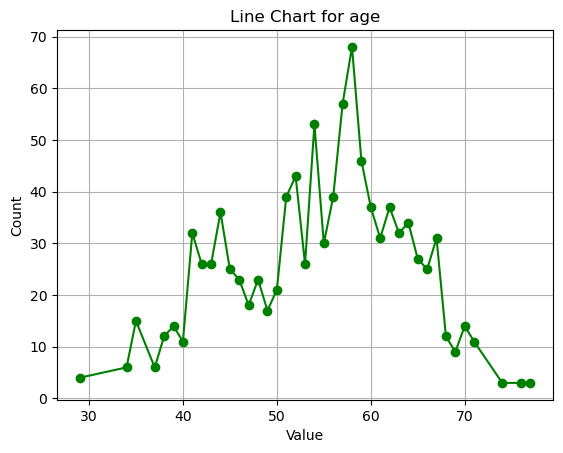

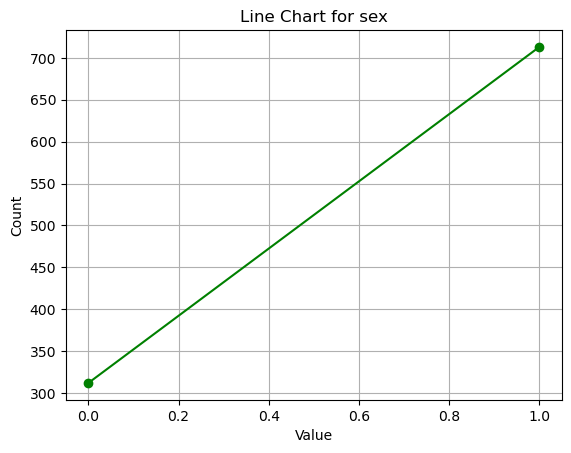

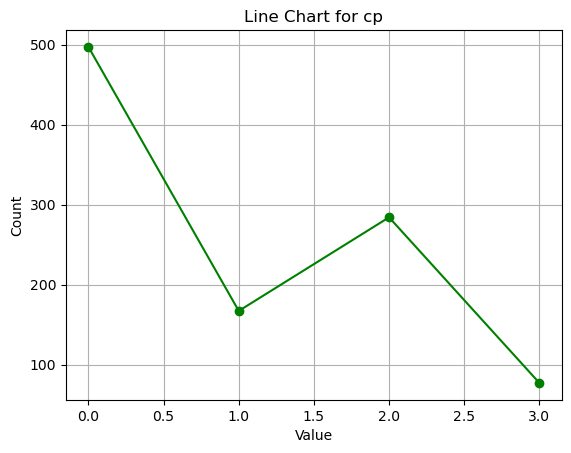

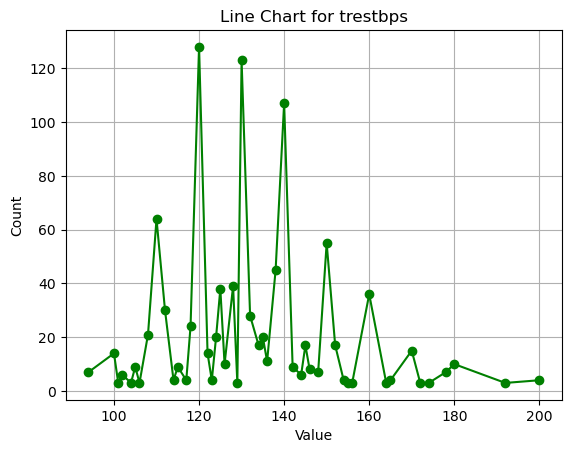

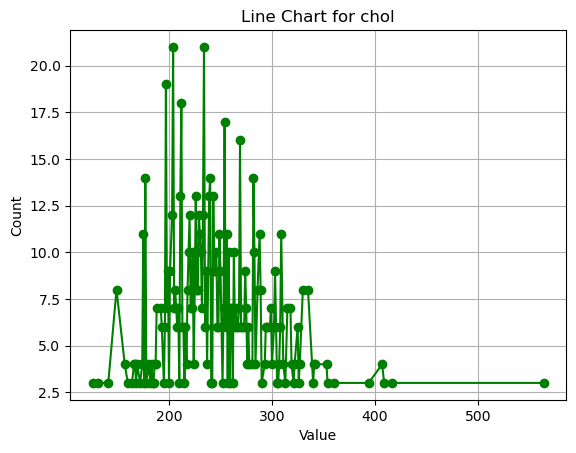

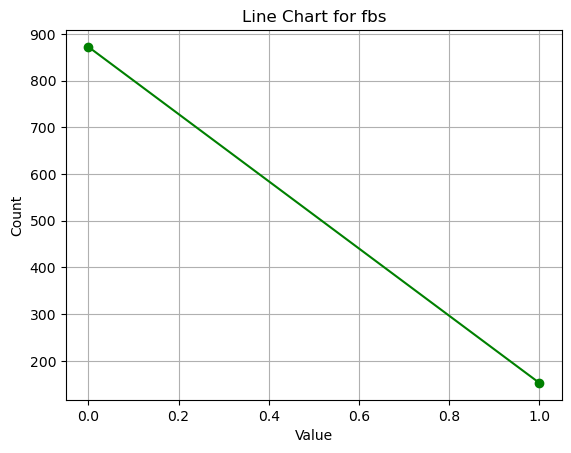

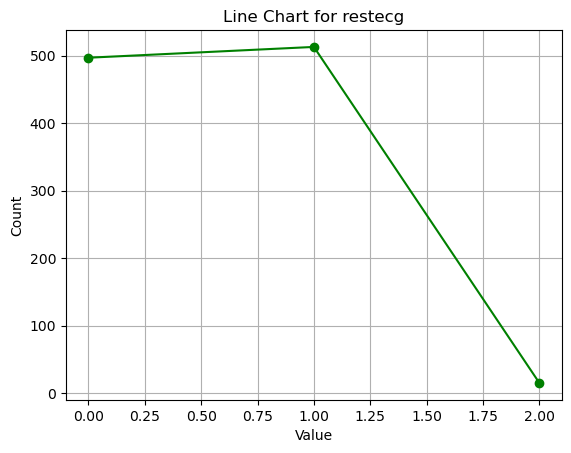

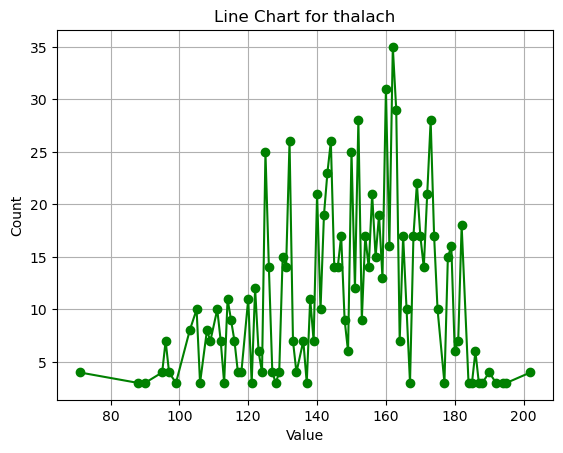

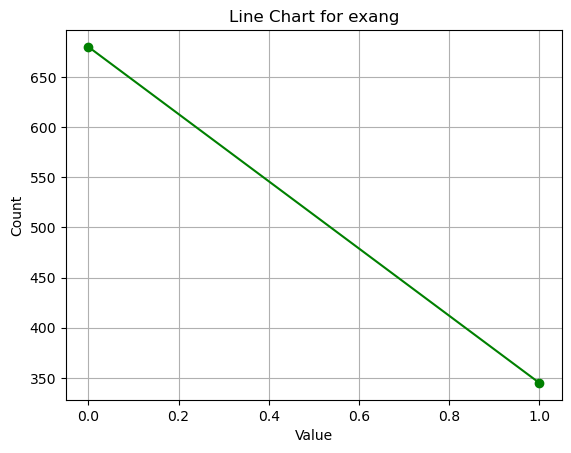

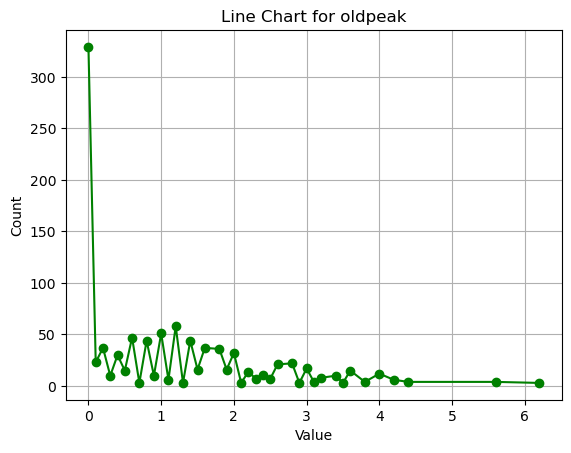

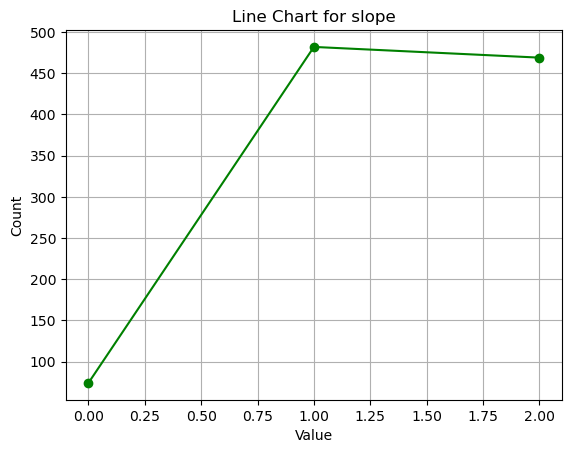

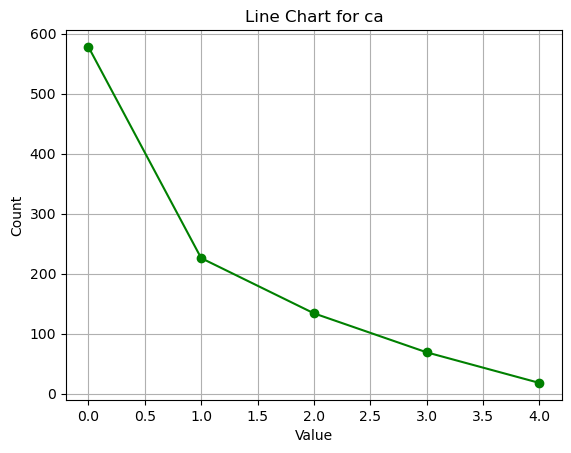

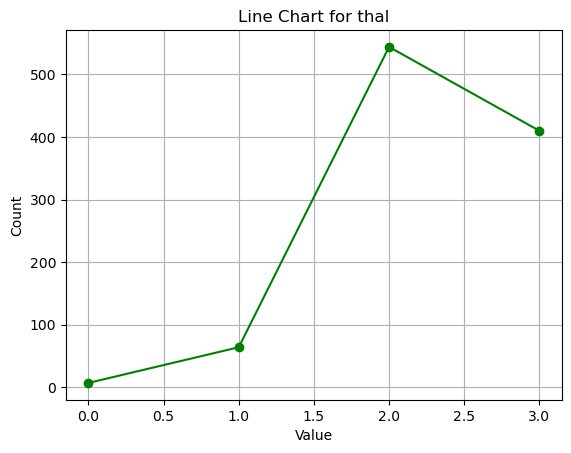

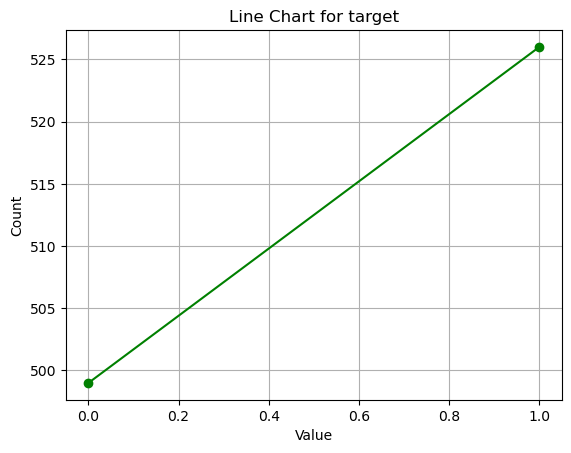

In [10]:
import matplotlib.pyplot as plt

# Iterasi melalui setiap kolom dalam DataFrame
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  # Cek jika tipe data kolom numerik
        plt.figure()  # Membuat plot baru untuk setiap kolom
        df[column].value_counts().sort_index().plot(kind='line', marker='o', color='green')  # Membuat line chart
        plt.title(f'Line Chart for {column}')  # Memberikan judul pada chart
        plt.xlabel('Value')  # Memberikan label pada sumbu x
        plt.ylabel('Count')  # Memberikan label pada sumbu y
        plt.grid(True)  # Menampilkan grid
        plt.show()  # Menampilkan plot

### OUTLIER

Melihat outlier menggunakan boxplot

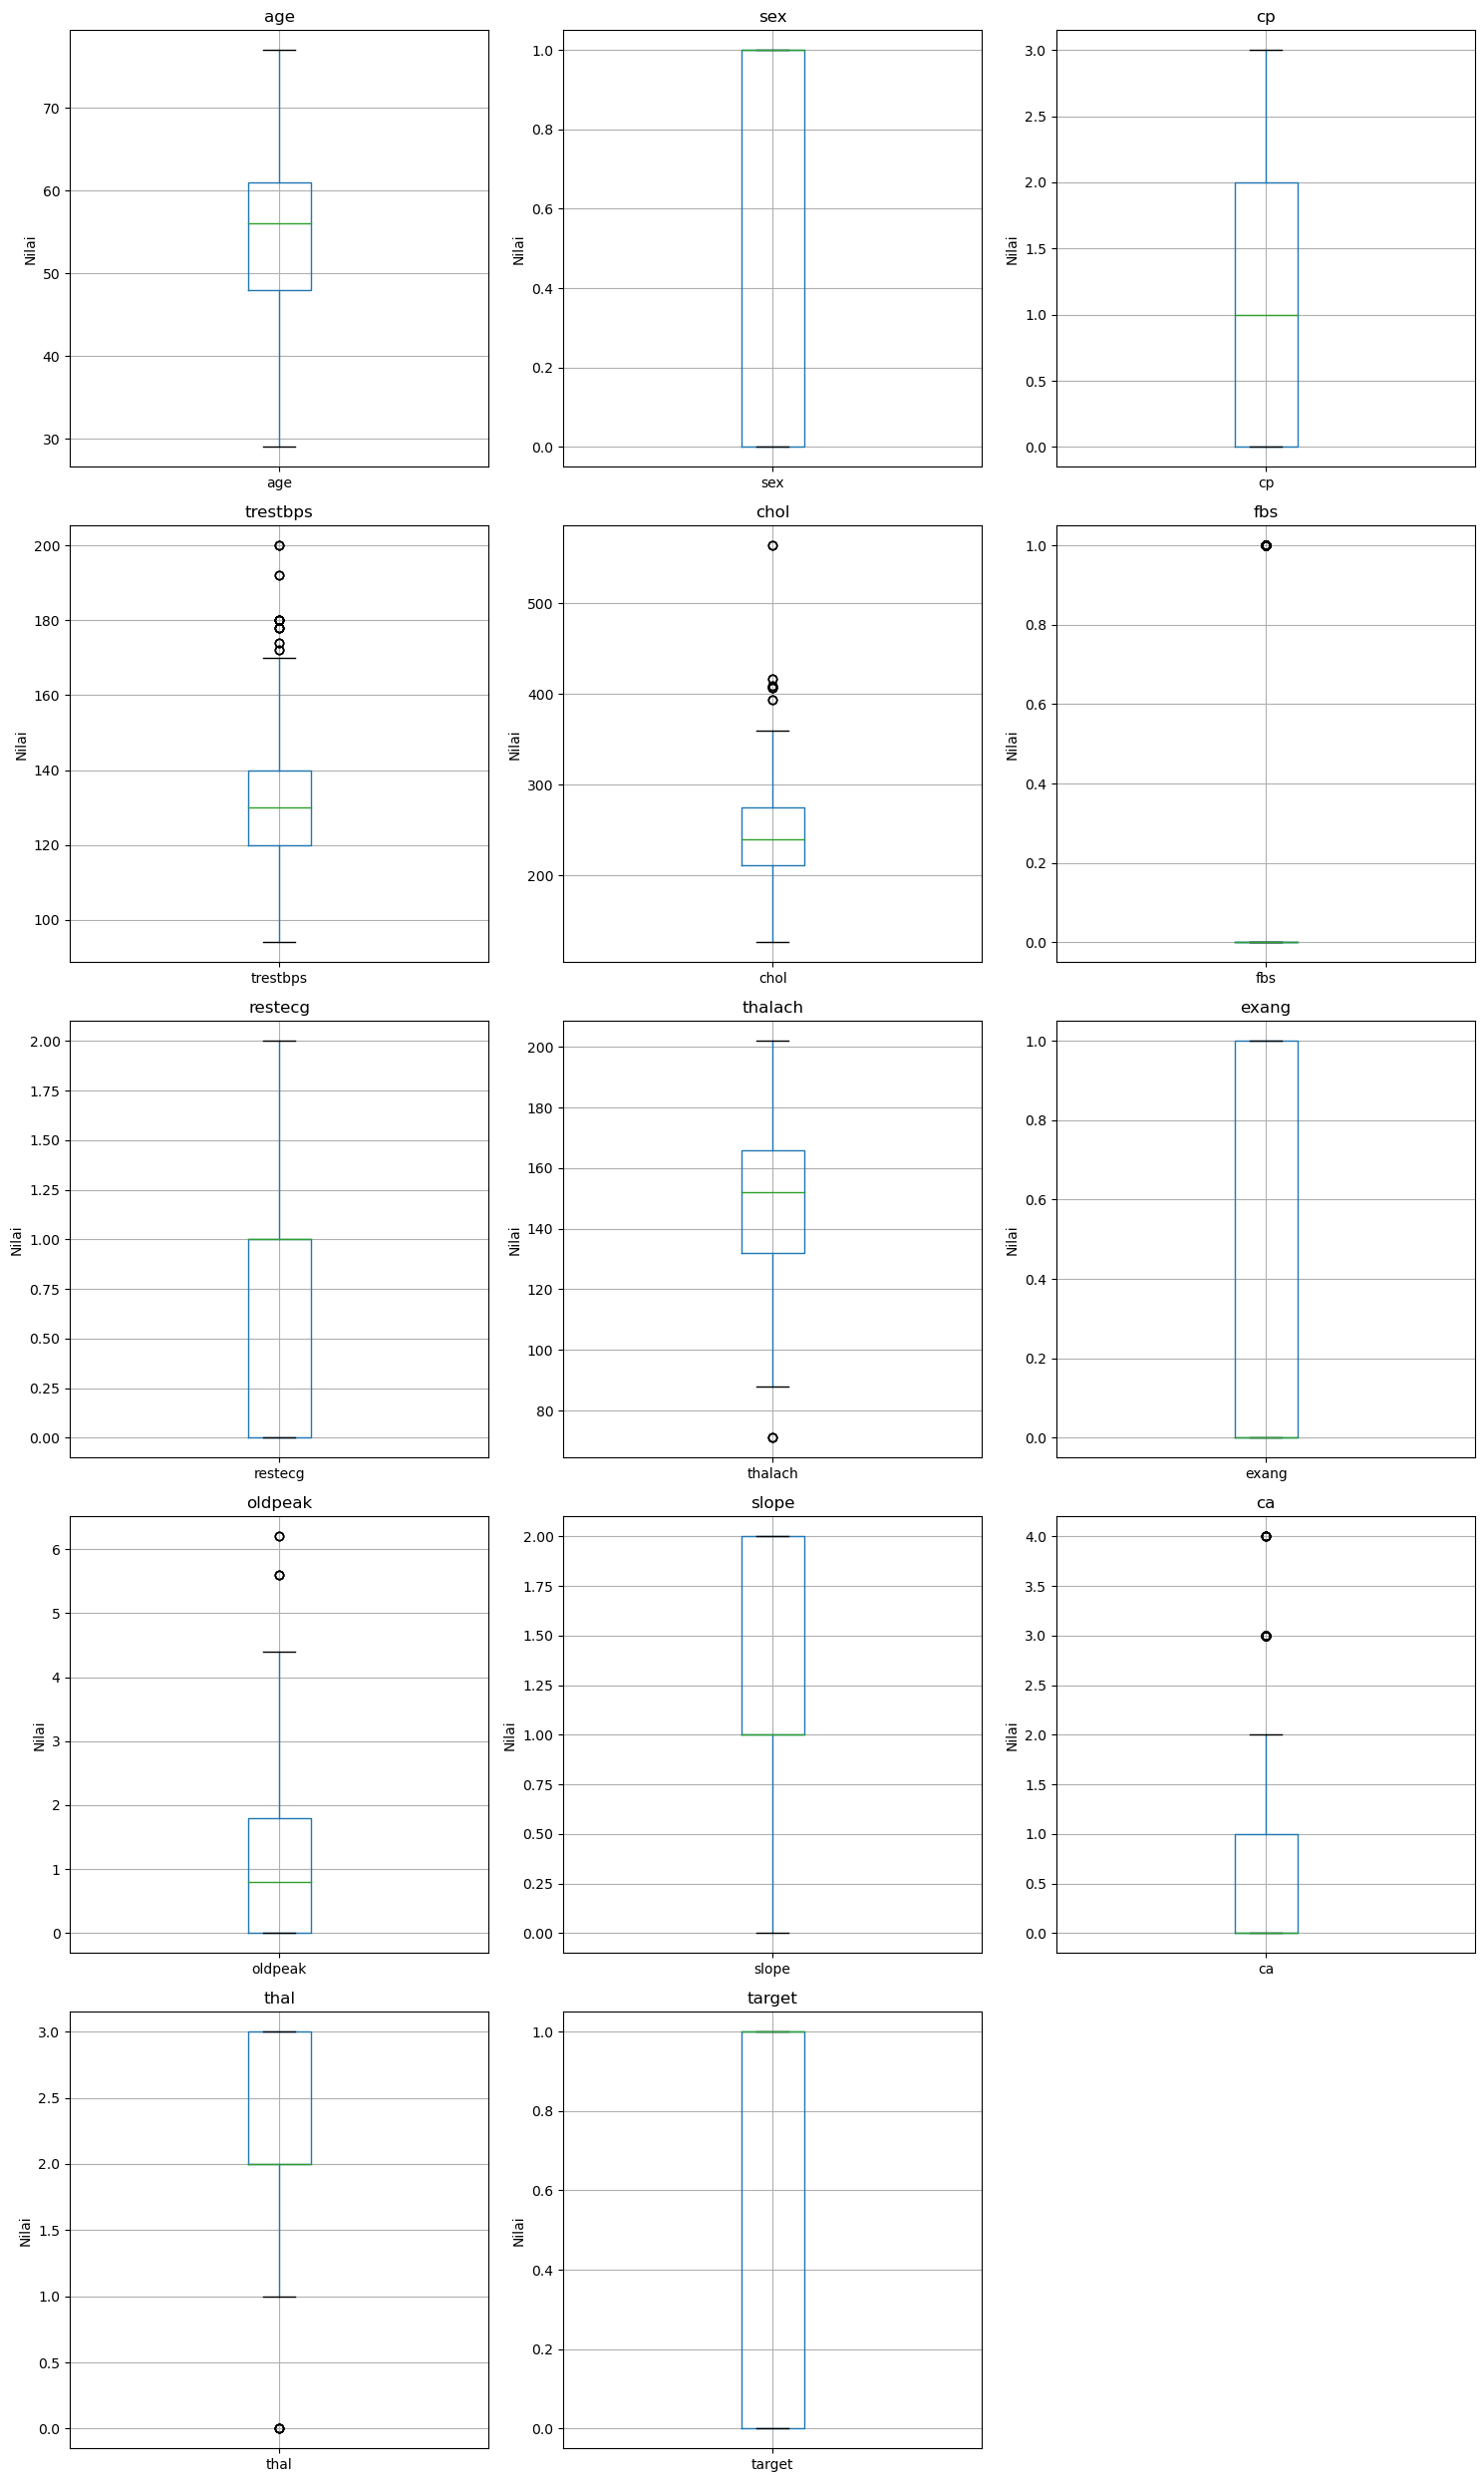

In [11]:
import matplotlib.pyplot as plt

# Kemudian lanjutkan dengan menggunakan plt di sini

# Menghitung jumlah kolom dan mengatur ukuran subplot layout
num_cols = len(df.columns)
num_rows = (num_cols - 1) // 3 + 1  # Membagi jumlah kolom dengan 3 dan menambahkan 1 jika ada sisa
plt.figure(figsize=(15, num_rows * 5))  # Mengatur ukuran plot berdasarkan jumlah kolom

# Loop untuk membuat boxplot untuk setiap kolom
for i, column in enumerate(df.columns):
    plt.subplot(num_rows, 3, i+1)  # Mengatur subplot sesuai dengan jumlah kolom
    df.boxplot(column=column)  # Membuat boxplot untuk kolom saat ini
    plt.title(column)  # Memberi judul plot
    plt.ylabel('Nilai')  # Memberi label sumbu y
    plt.xlabel('')  # Menghapus label sumbu x (tidak diperlukan untuk plot ini)

# Mengatur layout plot agar rapi
plt.tight_layout()

# Menampilkan plot
plt.show()

Mendeteksi jumlah outlier dalam tiap kolom

In [12]:
import pandas as pd

# Fungsi untuk menghitung jumlah outlier dalam suatu kolom
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    outliers_count = ((column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR))).sum()
    return outliers_count

# Menghitung jumlah outlier untuk setiap kolom
outliers_count_per_column = df.apply(count_outliers)

# Menampilkan jumlah outlier untuk setiap kolom
print(outliers_count_per_column)


age           0
sex           0
cp            0
trestbps     30
chol         16
fbs         153
restecg       0
thalach       4
exang         0
oldpeak       7
slope         0
ca           87
thal          7
target        0
dtype: int64


Melihat outlier

In [13]:
import pandas as pd

# Fungsi untuk menghitung outlier dalam suatu kolom
def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Loop untuk menampilkan outlier untuk setiap kolom
for column in df.columns:
    outliers = find_outliers(df[column])
    if not outliers.empty:
        print(f"Outliers dalam kolom '{column}':")
        print(outliers)
        print()


Outliers dalam kolom 'trestbps':
29     180
47     178
87     174
137    180
151    192
175    200
229    178
246    192
257    180
294    200
326    192
343    172
396    180
436    174
452    178
496    180
508    200
509    180
528    178
609    180
624    178
636    174
679    180
688    200
837    172
891    180
896    178
944    178
971    172
986    180
Name: trestbps, dtype: int64

Outliers dalam kolom 'chol':
123    417
158    564
179    409
192    564
255    394
450    407
464    564
481    407
542    394
578    394
641    409
665    417
685    407
889    407
958    417
996    409
Name: chol, dtype: int64

Outliers dalam kolom 'fbs':
1       1
4       1
11      1
14      1
19      1
       ..
993     1
999     1
1003    1
1006    1
1016    1
Name: fbs, Length: 153, dtype: int64

Outliers dalam kolom 'thalach':
267    71
296    71
378    71
559    71
Name: thalach, dtype: int64

Outliers dalam kolom 'oldpeak':
54     5.6
55     5.6
69     6.2
393    6.2
526    6.2
613    5.6
8

### Handling Outlier

In [14]:
import numpy as np 

# handling outliers
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti nilai outlier dengan nilai batas atas atau batas bawah terdekat
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Menggunakan fungsi handle_outliers_iqr untuk setiap kolom yang memiliki outlier
columns_with_outliers = ['trestbps', 'chol','thalach', 'oldpeak', 'ca', 'thal']
for column in columns_with_outliers:
    handle_outliers_iqr(df, column)

# Cetak DataFrame setelah outlier ditangani
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2.0,3.0,0
1,53,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0.0,3.0,0
2,70,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0.0,3.0,0
3,61,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1.0,3.0,0
4,62,0,0,138.0,294.0,1,1,106.0,0,1.9,1,2.5,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140.0,221.0,0,1,164.0,1,0.0,2,0.0,2.0,1
1021,60,1,0,125.0,258.0,0,0,141.0,1,2.8,1,1.0,3.0,0
1022,47,1,0,110.0,275.0,0,0,118.0,1,1.0,1,1.0,2.0,0
1023,50,0,0,110.0,254.0,0,0,159.0,0,0.0,2,0.0,2.0,1


Melihat boxplot setelah penanganan outlier

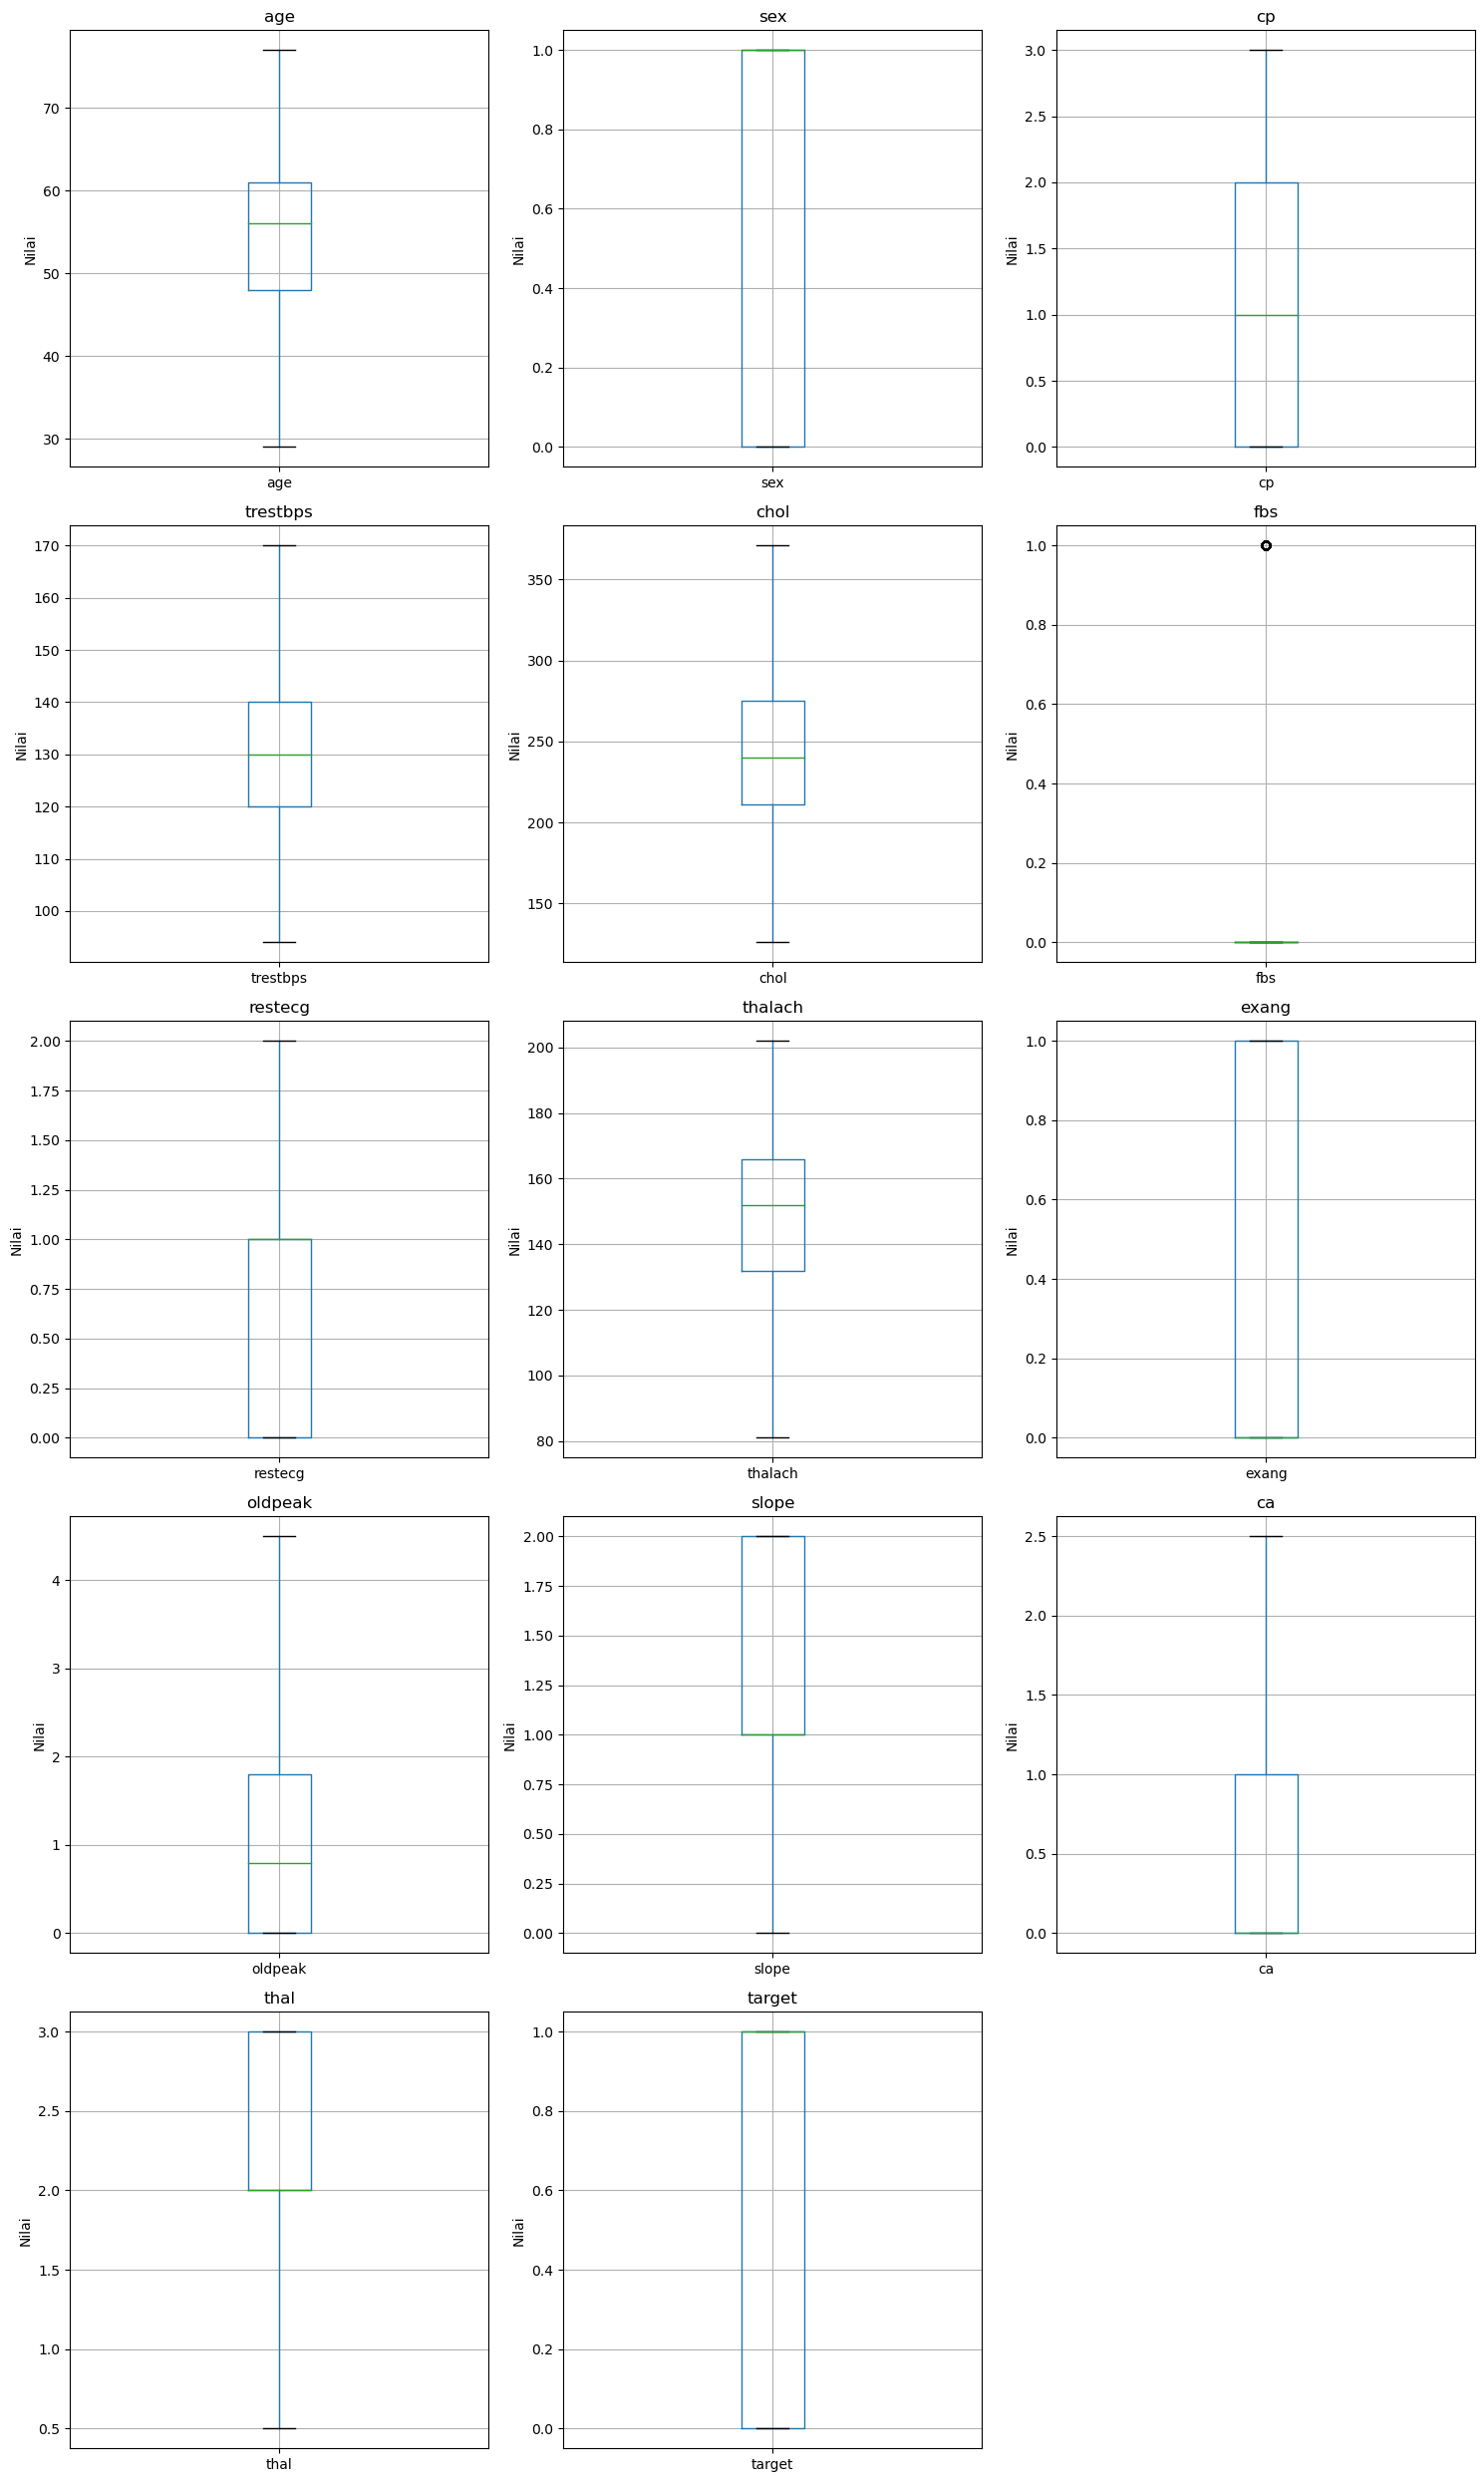

In [15]:
# Menghitung jumlah kolom dan mengatur ukuran subplot layout
num_cols = len(df.columns)
num_rows = (num_cols - 1) // 3 + 1  # Membagi jumlah kolom dengan 3 dan menambahkan 1 jika ada sisa
plt.figure(figsize=(15, num_rows * 5))  # Mengatur ukuran plot berdasarkan jumlah kolom

# Loop untuk membuat boxplot untuk setiap kolom
for i, column in enumerate(df.columns):
    plt.subplot(num_rows, 3, i+1)  # Mengatur subplot sesuai dengan jumlah kolom
    df.boxplot(column=column)  # Membuat boxplot untuk kolom saat ini
    plt.title(column)  # Memberi judul plot
    plt.ylabel('Nilai')  # Memberi label sumbu y
    plt.xlabel('')  # Menghapus label sumbu x (tidak diperlukan untuk plot ini)

# Mengatur layout plot agar rapi
plt.tight_layout()

# Menampilkan plot
plt.show()

### IMBALANCE DATA

In [16]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

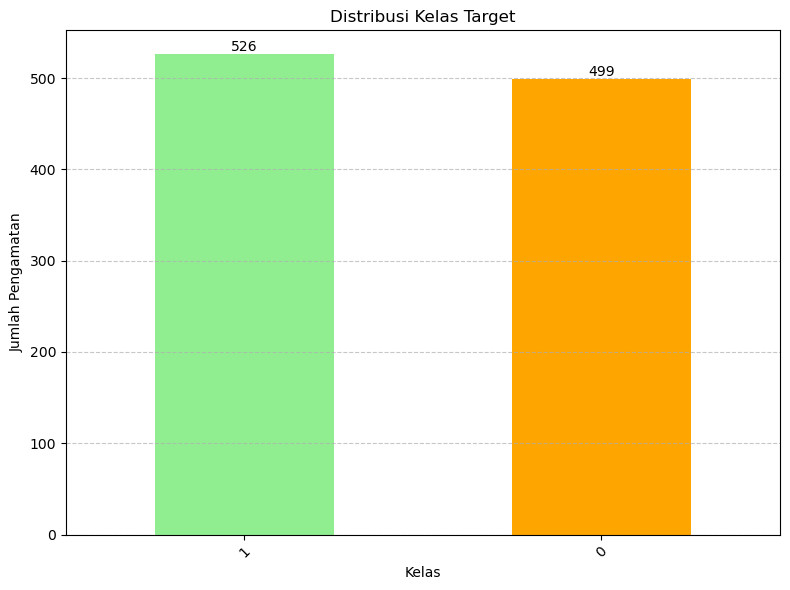

In [17]:
# Menghitung jumlah pengamatan untuk setiap nilai dalam kolom 'target'
target_counts = df['target'].value_counts()

colors = ['lightgreen', 'orange']

# Membuat bar chart dengan warna yang berbeda untuk setiap kelas
plt.figure(figsize=(8, 6))
bars = target_counts.plot(kind='bar', color=colors)

# Menambahkan teks pada setiap batang diagram batang
for i, count in enumerate(target_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Distribusi Kelas Target')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Pengamatan')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

Dari visualisasi diatas dapat dikatakan bahwa variabel target balance maka tidak perlu tindak lanjut. Imbalance data perlu ditangani ketika jumlah kelas dalam variabel target mengalami perbedaan yang terlalu jauh. Dalam penanganan imbalance data dapat diatasi dengan teknik oversampling dan undersampling

### FEATURE ENCODING

In [18]:
# Melakukan one-hot encoding
df_encoded = pd.get_dummies(df, columns=['cp', 'restecg', 'thal'], drop_first=True)

# Mengubah True/False menjadi 0/1
df_encoded = df_encoded.astype(int)
df_encoded

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1.0,thal_2.0,thal_3.0
0,52,1,125,212,0,168,0,1,2,2,0,0,0,0,1,0,0,0,1
1,53,1,140,203,1,155,1,3,0,0,0,0,0,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2,0,0,0,0,0,0,1,0,0,0,1
3,61,1,148,203,0,161,0,0,2,1,0,0,0,0,1,0,0,0,1
4,62,0,138,294,1,106,0,1,1,2,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,0,164,1,0,2,0,1,1,0,0,1,0,0,1,0
1021,60,1,125,258,0,141,1,2,1,1,0,0,0,0,0,0,0,0,1
1022,47,1,110,275,0,118,1,1,1,1,0,0,0,0,0,0,0,1,0
1023,50,0,110,254,0,159,0,0,2,0,1,0,0,0,0,0,0,1,0


# 2. Exploratory Data Analysis (EDA)

### Mengelaborasi features dan tipe data (nominal, ordinal, numerical)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   float64
 4   chol      1025 non-null   float64
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   float64
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   float64
 12  thal      1025 non-null   float64
 13  target    1025 non-null   int64  
dtypes: float64(6), int64(8)
memory usage: 112.2 KB


##### Nominal ( Variabel yang mewakili kategori atau jenis tanpa adanya urutan tertentu di antara nilainya):

- sex = merupakan variabel yang menunjukkan jenis kelamin pasien. Memiliki nilai 0 yang menandakan Laki-laki dan 0 Perempuan

- fbs = merupakan kadar gula darah pada pasien.  Nilai 1 menunjukkan kadar gula darah lebih dari 120 mg/dL, sementara nilai 0 menunjukkan kadar gula darah 120 mg/dL atau kurang.

- restecg = Resting Electrocardiographic Results (Hasil Elektrokardiogram Istirahat). Memiliki 3 value 0 menandakan Normal, 1 menandakan Memiliki gelombang Q abnormal, 2 menandakan adanya gambaran infark sebelumnya

- exang =  Menyimpan apakah pasien mengalami angina yang diinduksi oleh latihan atau tidak. Nilai 1 menandakan Ya, 0 menandakan Tidak.

- thal = (The Slope of the Peak Exercise ST Segment) menunjukkan hasil diagnosis thalassemia pada pasien. Nilai 1 menunjukkan "Normal", nilai 2 menunjukkan "Fixed Defect", dan nilai 3 menunjukkan "Reversible Defect"

- target = menunjukkan status penyakit pada pasien. Nilai 1 menunjukkan adanya penyakit jantung dan  0 menunjukkan tidak ada penyakit jantung.

- ca = menggambarkan jumlah pembuluh darah utama yang teridentifikasi atau diwarnai oleh fluoroscopy dalam suatu kondisi medis. Memiliki 4 nilai yaitu 0 menandakan tidak ada pembuluh darah utama yang teridentifikasi atau diwarnai oleh fluoroscopy, 1 menandakan Satu pembuluh darah utama teridentifikasi atau diwarnai, 2 menandakan dua pembuluh darah utama teridentifikasi atau diwarnai, 3 menandakan tiga pembuluh darah utama teridentifikasi atau diwarnai.

##### Ordinal (Variabel yang mewakili kategori dengan urutan tertentu):

- cp =  jenis nyeri dada yang dirasakan oleh pasien. Memiliki 4 tingkaran jenis nyeri dada yaitu Memiliki 4 value yaitu 0 menandakan Tidak ada nyeri dada, 1 menandakan Nyeri dada atipikal, 2 menandakan Nyeri dada tipikal angina (tertindih), 3 menandakan Nyeri dada non-angina (nyeri dada akibat masalah selain jantung)

- slope = Kemiringan segmen ST puncak latihan pada elektrokardiogram. nilai 0 menunjukkan kemiringan segmen ST yang datar atau negatif setelah latihan fisik,1 menunjukkan kemiringan segmen ST yang datar atau sedikit positif,  2 menunjukkan kemiringan segmen ST yang positif yang cenderung curam.

##### Numerik (Variabel berupa angka dan dapat dikur secara kontinu atau diskrit) :

- age = variabel yang menunjukkan umur pasien

- trestbps = tekanan darah istirahat pasien

- chol = kolesterol serum dalam darah, diukur dalam miligram per desiliter (mg/dL).

- thalach = denyut jantung maksimum yang tercapai selama tes latihan.

- oldpeak = depresi segmen ST pada elektrokardiogram yang diinduksi oleh latihan fisik, relatif terhadap istirahat.



Menjelaskan kondisi dan perbedaan penggunaan mean, median, dan modus

#### Menjelaskan kondisi dan perbedaan penggunaan mean, median, dan modus

1. Mean merupakan nilai rata-rata dalam data.

    Mean biasanya juga digunakan dalam penanganan missing value, dalam hal ini mean digunakan apabila variabel tersebut bertipekan integer dan juga float.

2. Median merupakan nilai tengah dalam data.

    Median juga digunakan seperti halnya mean dalam penanganan missing values.Nilai median juga digunakan dalam penanganan outlier contohnya pada penggunaan perhitungan IQR (Intel Quartile Range).

3. Modus merupakan nilai yang sering muncul dalam data.

    Berbeda dengan mean dan median, pada saat penanganan missing value modus digunakan untuk mengatasi data yang bertipekan kategorikal. Hal ini dikarenakan data kategorik biasanya merupakan data yang berisikan teks, dari teks ini direpresentasikan dalam bentuk angka yang mewakili cluster tersebut contohnya jenis kelamin laki laki dilambangkan dengan 0 sedangkan jenis kelamin perempuan dilambangkan dengan 1. Selain itu pada data kategorik, juga bisa mempresentasikan bahwa data tersebut merupakan tingkatan contohnya dalam tingkat pendidikan jika 0 itu SMP, 1 itu SMA, dan 2 merupakan S1

### Menemukan dan mendeskripsikan statistical five summaries

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.260488,16.532208,94.0,120.0,130.0,140.0,170.0
chol,1025.0,244.981463,47.746162,126.0,211.0,240.0,275.0,371.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.153171,22.881210,81.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.062244,1.141865,0.0,0.0,0.8,1.8,4.5


Kolom: Age 
- Penjelasan: Umur
- Insight: Didapatkan bahwa usia pasien rata-rata sekitar 54 tahun dengan usia tertua 77 tahun dan usia termuda 29 tahun.

Kolom: Trestbps
- Penjelasan: Tekanan darah pasien saat sedang istirahat. Diukur dalam milimeter raksa (mmHg).
- Insight: Tekanan darah pasien saat sedang istirahat rata-rata 131,63 mmHg dengan tekanan darah tertinggi 170 mmHg dan tekanan darah terendah 94 mmHg.

Kolom: Chol
- Penjelasan: Konsentrasi kolesterol dalam serum darah pasien, diukur dalam miligram per desiliter (mg/dl).
- Insight : Konsentrasi kolestrol pasien rata-rata 244,98 mg/dl. Dengan nilai kosentrasi kolestrol terendah adalah 126 mg/dl dan nilai kosentrasi kolestrol tertinggi adalah 371 mg/dl.

Kolom: Thalach
- Penjelasan: Detak jantung maksimum yang dicapai oleh pasien selama tes latihan atau stres.
- Insight : Rata-rata detak jantung pasien adalah 149.15  dengan detak jantung terpendek adalah 81 dan detak jantung tertinggi adalah 202.

Kolom: Oldpeak
- Penjelasan: Depresi segmen ST pada elektrokardiogram yang diinduksi oleh latihan relatif terhadap istirahat.
- Insight : Rata-rata depresi segmen ST pasien 106. Dengan nilai minimal 0 dan nilai maksimal 4,5.

### Mendeskripsikan distribusi data

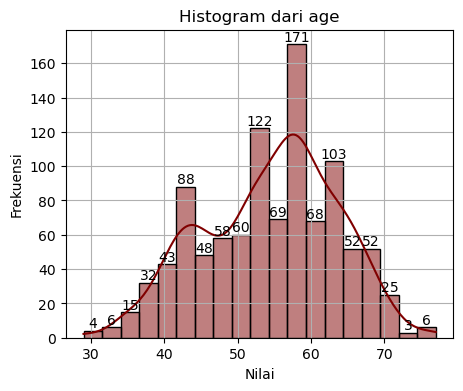

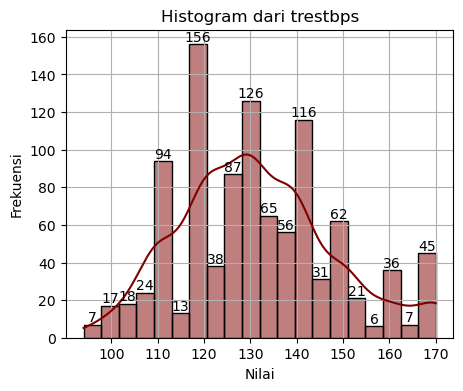

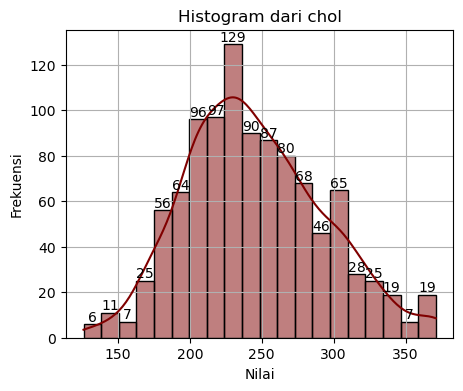

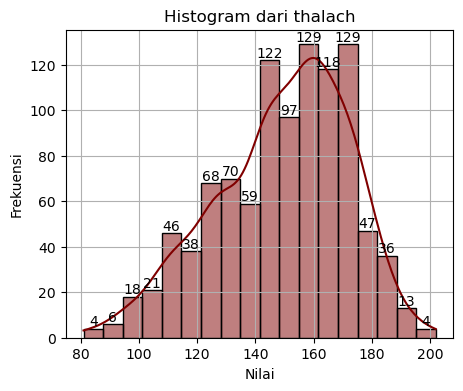

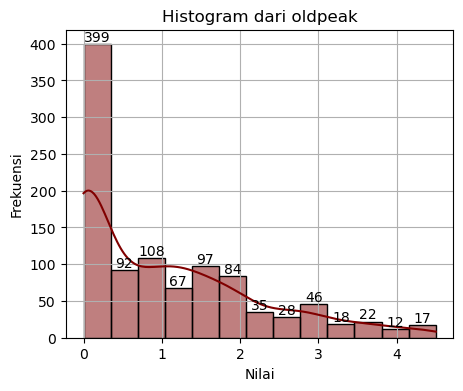

In [21]:
import seaborn as sns

kolom = ["age", "trestbps", "chol", "thalach", "oldpeak"]

for feature in kolom:
    plt.figure(figsize=(5, 4))
    sns.histplot(df[feature], kde=True, color='maroon')  # Mengubah warna plot menjadi hijau
    plt.title(f'Histogram dari {feature}')
    plt.xlabel('Nilai')
    plt.ylabel('Frekuensi')
    plt.grid(True)

    # Menambahkan jumlah angka di atas batang histogram
    for p in plt.gca().patches:
        plt.gca().annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='bottom', fontsize=10, color='black')

    plt.show()

Distribution data ada 3 yaitu:
- Positive skewness (Right skewness) dalah kondisi di mana distribusi data memiliki ekor yang lebih panjang di sebelah kanan daripada di sebelah kiri. Dalam hal ini, nilai rata-rata lebih besar dari nilai median, yang menunjukkan bahwa ada beberapa nilai yang sangat tinggi yang menyebabkan distribusi data tersebut tidak simetris.

- Negative skewness (Left skewness)adalah kondisi di mana distribusi data memiliki ekor yang lebih panjang di sebelah kiri daripada di sebelah kanan. Dalam hal ini, nilai rata-rata lebih kecil dari nilai median, yang menunjukkan bahwa ada beberapa nilai yang sangat rendah yang menyebabkan distribusi data tersebut tidak simetris.

- symmetrical distribution mengacu pada distribusi di mana dua bagian dari distribusi tersebut memiliki bentuk yang mirip atau sama jika dilihat dari tengahnya. 


Dalam data diatas disimpulkan bahwa age dan thalach termasuk Left skewness (dikarenakan nilai mean nya memiliki lebih rendah dibandingkan median), chol dan oldpeak termasuk Right skewness (dikarenakan nilai median nya memiliki lebih rendah dibandingkan mean)

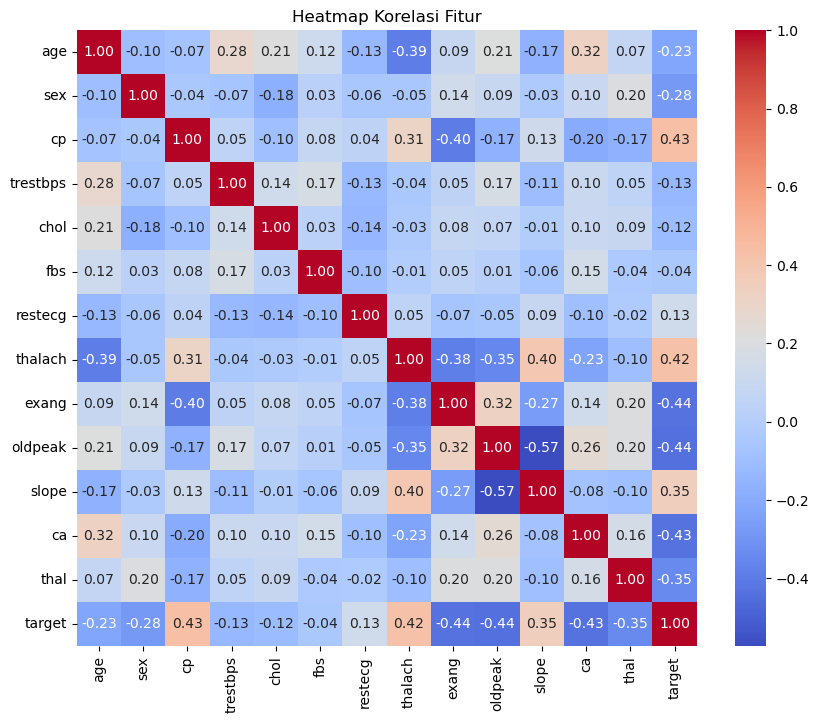

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung korelasi antar fitur
correlation_matrix = df.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Heatmap Korelasi Fitur')
plt.show()


In [23]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['target'].abs().sort_values(ascending=False)
# correlation_with_target
# Tampilkan korelasi antara variabel target dan variabel lainnya beserta tandanya
for feature in correlation_with_target.index:
    correlation = correlation_matrix.loc['target', feature]
    if correlation < 0:
        print(f" {feature}: {correlation}")
    else:
        print(f" {feature}: {correlation}")

 target: 1.0
 oldpeak: -0.4428468716951542
 exang: -0.438028550055846
 cp: 0.434854250052737
 ca: -0.4323244033825308
 thalach: 0.4234448822806556
 slope: 0.3455117514359986
 thal: -0.3451865462549731
 sex: -0.2795007572922624
 age: -0.22932355126761092
 restecg: 0.13446820873908916
 trestbps: -0.13230077587972067
 chol: -0.11825403141370537
 fbs: -0.041163547464651236


Korelasi menunjukkan seberapa erta hubungan antara dua variabel.
- Jika angka mendekati +1 menunjukkan hubungan positif sempurna, yang berarti bahwa jika satu variabel naik, variabel lainnya juga naik secara linier. Contohnya korelasi target dengan thalach sebesar 0.423. Hal ini menunjukkan bahwa detak jantung maksimum yang lebih tinggi memiliki korelasi positif dengan resiko penyakit jantung.

- Jika angka mendekati -1 menunjukkan hubungan negatif sempurna, yang berarti bahwa jika satu variabel naik, variabel lainnya turun secara linier. Contohnya korelasi target dengan oldpeak sebesar -0.4428. Hal ini menunjukkan semakin tinggi nilai oldpeak, semakin rendah kemungkinan resiko penyakit jantung.

- Jika angka 0 menunjukkan tidak ada hubungan linier antara dua variabel.




# ASSIGNMENT 3

### SPLIT DATA

In [24]:
# SPLIT DATA

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, RandomizedSearchCV

X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### FEATURE SELECTION

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
# Assuming X_train_scaled_df is your DataFrame
X = X_train.select_dtypes(include='number')

# Adding a constant column for intercept
X['Intercept'] = 1

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF, excluding the intercept
vif_data = vif_data[vif_data['Feature'] != 'Intercept']

vif_data

,Feature,VIF
0,age,1.483261
1,sex,1.124427
2,cp,1.290860
3,trestbps,1.168358
4,chol,1.150977
5,fbs,1.078968
6,restecg,1.064128
7,thalach,1.622298
8,exang,1.383688
9,oldpeak,1.631162


Semua nilai VIF terlihat relatif rendah, dengan tidak ada yang melebihi 2. Oleh karena itu, dapat disimpulkan bahwa tidak ada multicollinearity yang signifikan antara variabel-variabel independen

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
LRModel=LogisticRegression(random_state=16)
LRModel.fit(X_train,y_train)

# Make predictions on the testing data
y_pred = LRModel.predict(X_test)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


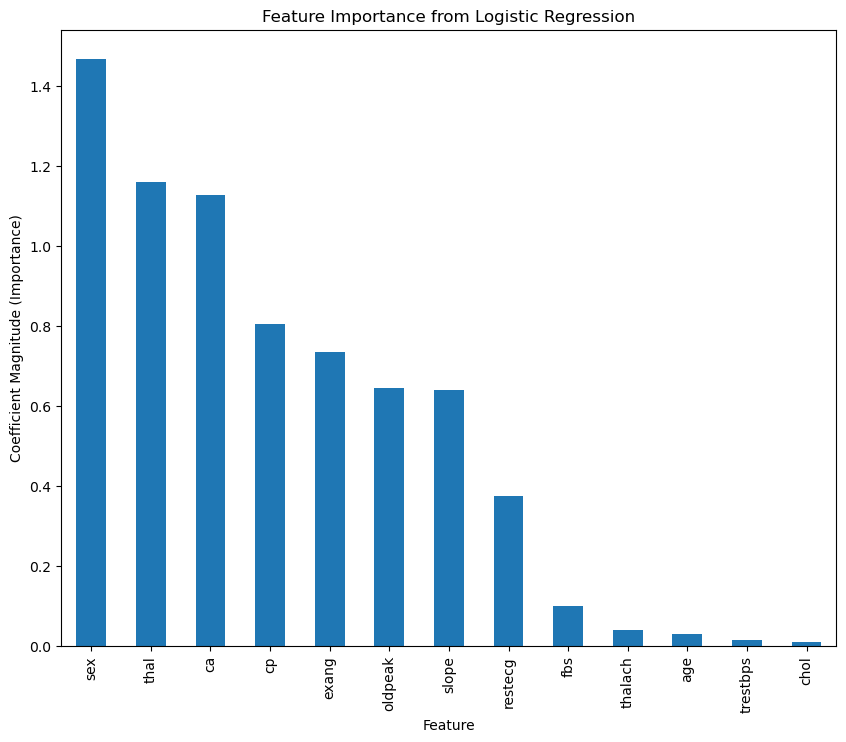

sex         1.467061
thal        1.159818
ca          1.126287
cp          0.803389
exang       0.734655
oldpeak     0.645339
slope       0.638531
restecg     0.374478
fbs         0.099426
thalach     0.038635
age         0.029834
trestbps    0.014890
chol        0.008725
dtype: float64


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Sample code for fitting the model (ensure this is adapted to your actual data)
# X_train, y_train = your_data_preparation_function()
# LRModel = LogisticRegression(random_state=16)
# LRModel.fit(X_train, y_train)

# Assuming 'X_train' is a DataFrame and contains your feature names
feature_names = X_train.columns

# Extract the coefficients from the Logistic Regression model
coefficients = LRModel.coef_[0]

# Create a Series to hold the coefficients, using the feature names as the index
importance = pd.Series(np.abs(coefficients), index=feature_names)

# Sort the feature importances in descending order
sorted_importance = importance.sort_values(ascending=False)

# Visualizing the Feature Importance
plt.figure(figsize=(10, 8))
sorted_importance.plot(kind='bar')
plt.title('Feature Importance from Logistic Regression')
plt.xlabel('Feature')
plt.ylabel('Coefficient Magnitude (Importance)')
plt.show()

# Output the sorted feature names and their importance scores
print(sorted_importance)


In [29]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[73, 29],
       [ 7, 96]], dtype=int64)

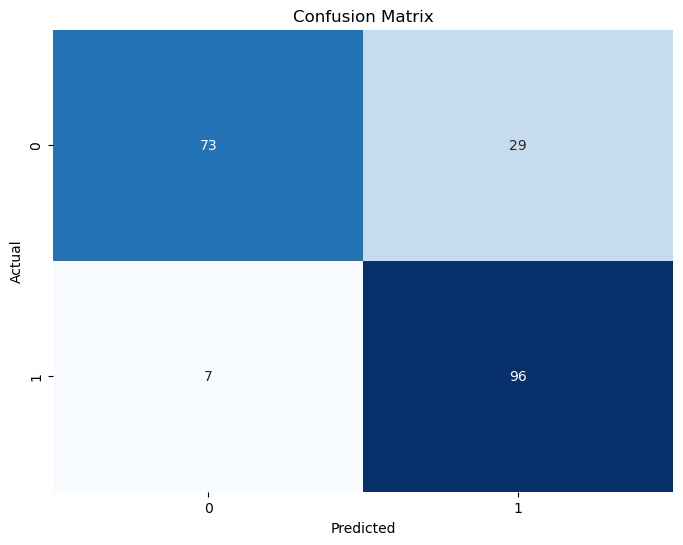

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Assuming cnf_matrix is your confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [31]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy_LR = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Logistic Regression Model Accuracy:", accuracy_LR)

Logistic Regression Model Accuracy: 0.824390243902439


### Decision Tree CLASSIFIER

In [32]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier model with a maximum depth of 3
DTModel = DecisionTreeClassifier(max_depth=3, random_state=16)

# Fit the model to the training data
DTModel.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_dt = DTModel.predict(X_test)


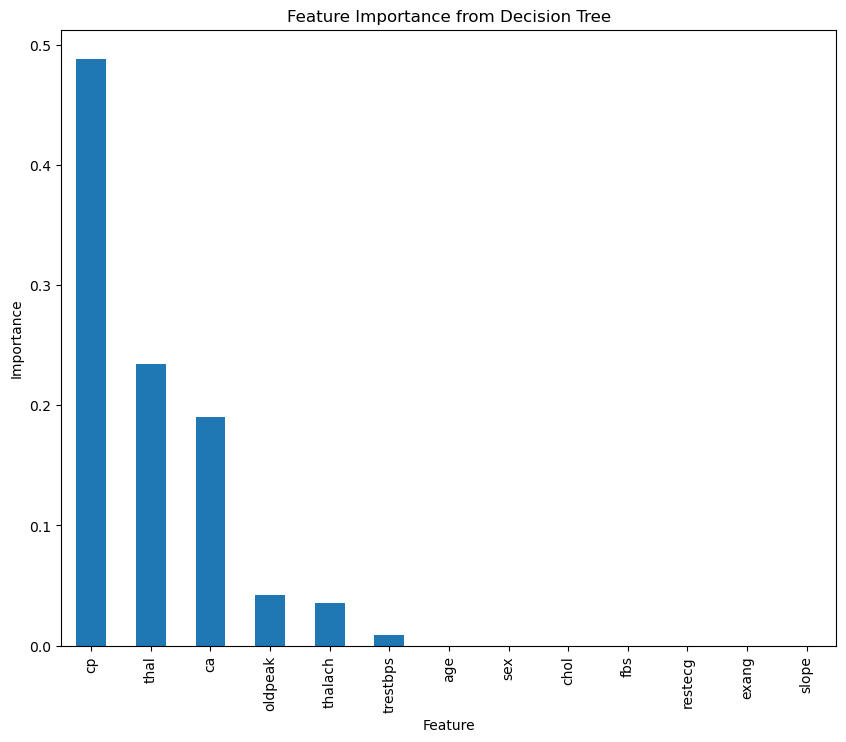

cp          0.487947
thal        0.234598
ca          0.190261
oldpeak     0.042526
thalach     0.035832
trestbps    0.008836
age         0.000000
sex         0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
exang       0.000000
slope       0.000000
dtype: float64


In [33]:
# Extract feature importances
feature_importances = DTModel.feature_importances_

# Assuming X_train is a DataFrame, we can use its column names.
# If not, you would need to replace 'feature_names' with a list of your actual feature names.
feature_names = X_train.columns

# Create a Series to hold the importances along with the index of feature names for better readability
importance = pd.Series(feature_importances, index=feature_names)

# Sort the feature importances in descending order
sorted_importance = importance.sort_values(ascending=False)

# Visualizing the Feature Importance
plt.figure(figsize=(10, 8))
sorted_importance.plot(kind='bar')
plt.title('Feature Importance from Decision Tree')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

# Output the sorted importance scores for reference
print(sorted_importance)


In [34]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_dt)
cnf_matrix

array([[69, 33],
       [12, 91]], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Print the accuracy
print("Decision Tree Model Accuracy:", accuracy_dt)


Decision Tree Model Accuracy: 0.7804878048780488


### Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier model with simple parameters
RFModel = RandomForestClassifier(n_estimators=100,  # Number of trees in the forest
                                 max_depth=5,       # Maximum depth of each tree
                                 random_state=16)   # For reproducible results

# Fit the model to the training data
RFModel.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = RFModel.predict(X_test)


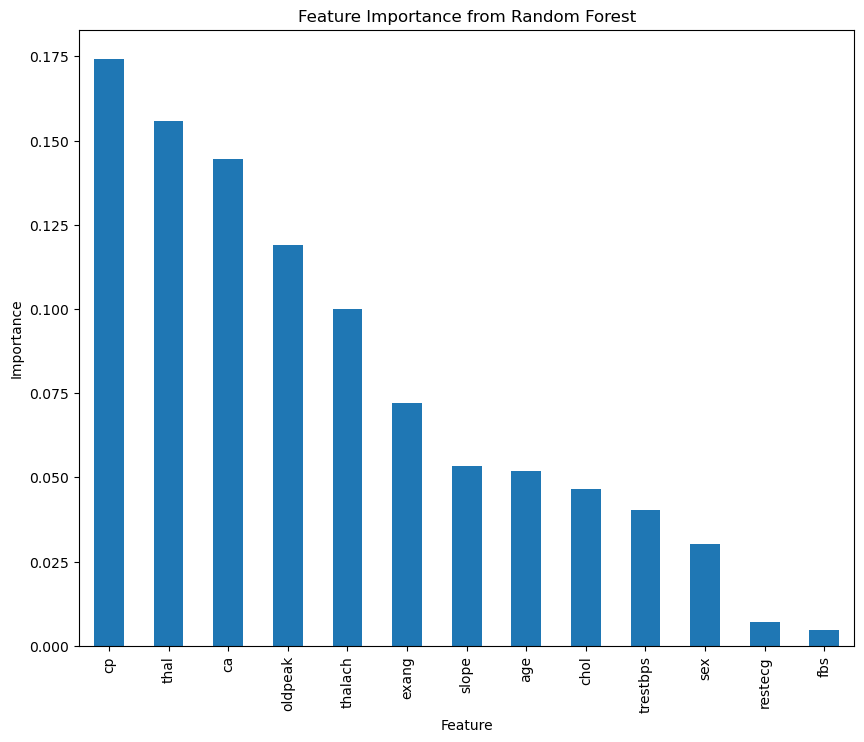

cp          0.174206
thal        0.155829
ca          0.144652
oldpeak     0.119060
thalach     0.100116
exang       0.071960
slope       0.053367
age         0.052003
chol        0.046564
trestbps    0.040235
sex         0.030335
restecg     0.007055
fbs         0.004618
dtype: float64


In [37]:
# Extract feature importances
feature_importances = RFModel.feature_importances_

# Assuming X_train is a DataFrame, we can use its column names.
# If not, you would need to replace 'feature_names' with a list of your actual feature names.
feature_names = X_train.columns

# Create a Series to hold the importances along with the index of feature names for better readability
importance = pd.Series(feature_importances, index=feature_names)

# Sort the feature importances in descending order
sorted_importance = importance.sort_values(ascending=False)

# Visualizing the Feature Importance
plt.figure(figsize=(10, 8))
sorted_importance.plot(kind='bar')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

# Output the sorted importance scores for reference
print(sorted_importance)

In [38]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
cnf_matrix

array([[82, 20],
       [ 4, 99]], dtype=int64)

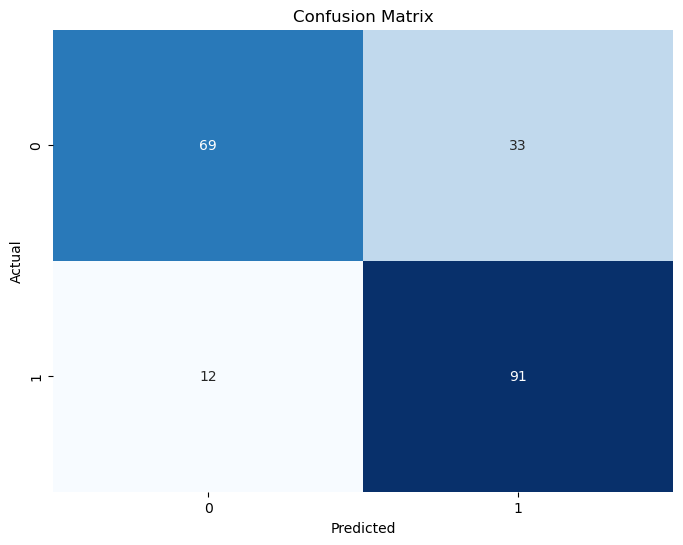

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Assuming cnf_matrix is your confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_dt)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [40]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy_RF = accuracy_score(y_test, y_pred_rf)

# Print the accuracy
print("Random Forest Model Accuracy:", accuracy_RF)

Random Forest Model Accuracy: 0.8829268292682927


### KESIMPULAN

Hasil keseluruhan akurasi dari beberapa algoritma klasifikasi :
- logistic regression = 0.824390243902439
- decision tree = 0.7804878048780488
- random forest = 0.8829268292682927

### CROSS VALIDATION

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Membuat dataset sintetis untuk contoh
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melakukan cross-validation dengan 5 fold
cv_scores = cross_val_score(rf_model, X, y, cv=5)

# Menampilkan skor cross-validation
print("Cross-validation scores:", cv_scores)

# Menampilkan rata-rata skor cross-validation
print("Mean CV accuracy:", cv_scores.mean())

Cross-validation scores: [0.93  0.905 0.9   0.905 0.855]
Mean CV accuracy: 0.8989999999999998


- `make_classification` digunakan untuk membuat dataset sintetis untuk keperluan demonstrasi.
- `RandomForestClassifier` digunakan untuk membuat model Random Forest dengan 100 pohon.
- `cross_val_score` digunakan untuk melakukan cross-validation dengan 5 fold dan mengembalikan skor untuk setiap fold.

In [42]:
# from sklearn.model_selection import cross_val_score

# # Buat model Random Forest
# RFModel = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=16)

# # Lakukan cross-validation dengan 5 fold
# cv_scores = cross_val_score(RFModel, X_train, y_train, cv=5)

# # Print nilai-nilai akurasi pada setiap fold
# print("Cross-Validation Scores:", cv_scores)

# # Print rata-rata akurasi dari cross-validation
# print("Average Cross-Validation Score:", cv_scores.mean())

### LEARNING CURVES

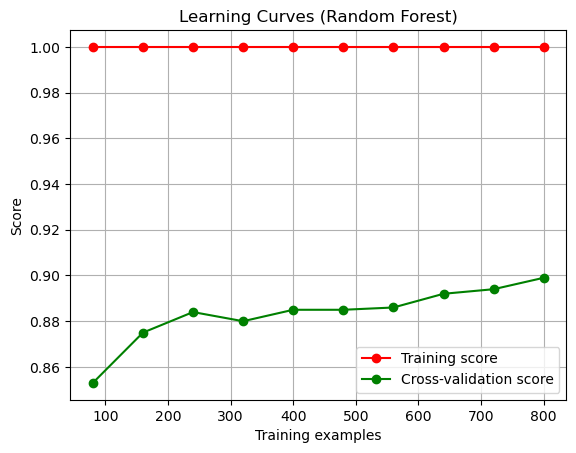

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Membuat dataset sintetis untuk contoh
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Menghitung learning curves
train_sizes, train_scores, test_scores = learning_curve(rf_model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Menghitung rata-rata skor untuk setiap ukuran data latih
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Menampilkan learning curves
plt.figure()
plt.title("Learning Curves (Random Forest)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

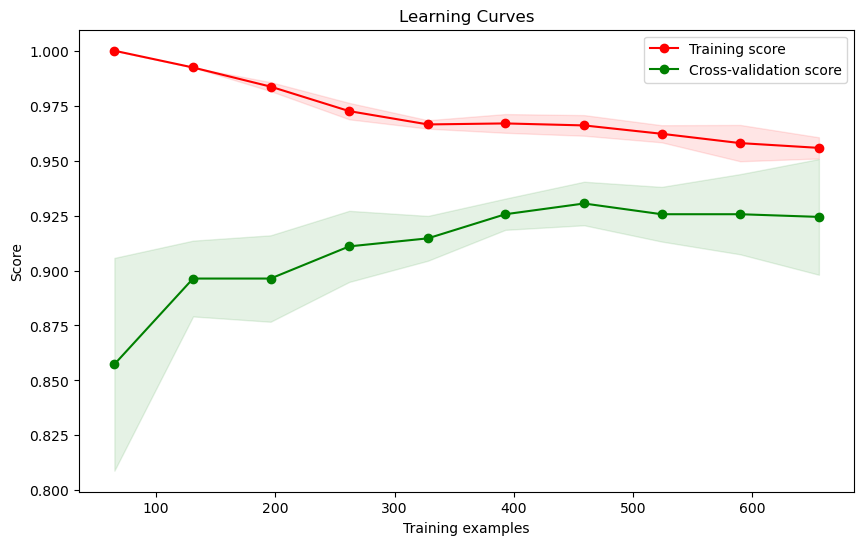

In [44]:
from sklearn.model_selection import learning_curve

# Define function to plot learning curves
def plot_learning_curves(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.title("Learning Curves")
    plt.show()

# Plot learning curves for the Random Forest classifier
plot_learning_curves(RFModel, X_train, y_train)